In [1]:
import numpy as np
import pandas as pd
from datetime import datetime

import warnings
warnings.filterwarnings("ignore")
import seaborn as sb
import matplotlib.pyplot as plt
import matplotlib

# Data preprocessing 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# K means 
from sklearn.cluster import KMeans

from sklearn.cluster import DBSCAN

# Silhouette score 
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

from sklearn import metrics
from sklearn.datasets import make_circles
import warnings
warnings.filterwarnings("ignore")

# K means 
from sklearn.cluster import KMeans

import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import NearestNeighbors


from sklearn.cluster import DBSCAN

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Data Preprocessing 

In [2]:
reviews = pd.read_csv("final_reviews.csv")

In [3]:
reviews

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,class,title,also_buy,brand,rank,also_view,main_cat,price,primary_category,sub_cat,product_type
0,4.0,True,2017-11-07,A2NIJTYWADLK57,0140503528,cotton clay,kids like story but while i really wanted a bo...,"good story, small size book though",good,A Pocket for Corduroy,"['0140501738', '0448421917', '0670063428', '04...",ingram book & distributor,422894.0,['0140501738'],Office Products,0.95,['Office and School Supplies'],['Education and Crafts'],['Early Childhood Education Materials']
1,4.0,True,2017-03-07,A2827D8EEURMP4,0140503528,emankcin,bought this used and it came in great conditio...,good,good,A Pocket for Corduroy,"['0140501738', '0448421917', '0670063428', '04...",ingram book & distributor,422894.0,['0140501738'],Office Products,0.95,['Office and School Supplies'],['Education and Crafts'],['Early Childhood Education Materials']
2,5.0,True,2016-06-25,APB6087F4J09J,0140503528,Starbucks Fan,every story and book about corduroy is fantast...,best books for all children,great,A Pocket for Corduroy,"['0140501738', '0448421917', '0670063428', '04...",ingram book & distributor,422894.0,['0140501738'],Office Products,0.95,['Office and School Supplies'],['Education and Crafts'],['Early Childhood Education Materials']
3,5.0,True,2016-02-21,A2DHERRZIPFU7X,0140503528,Caitlyn Jacobson,i purchased this book for my first grade class...,great for math!,great,A Pocket for Corduroy,"['0140501738', '0448421917', '0670063428', '04...",ingram book & distributor,422894.0,['0140501738'],Office Products,0.95,['Office and School Supplies'],['Education and Crafts'],['Early Childhood Education Materials']
4,5.0,False,2015-08-02,A2XCLJRGFANRC,0140503528,E. Ervin,having spent numerous years in an elementary s...,love corduroy,great,A Pocket for Corduroy,"['0140501738', '0448421917', '0670063428', '04...",ingram book & distributor,422894.0,['0140501738'],Office Products,0.95,['Office and School Supplies'],['Education and Crafts'],['Early Childhood Education Materials']
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019553,5.0,True,2016-12-31,A30ZM19J0CNAGJ,B01HJDG28E,Reggie: a music lover,night hawk is ten outstanding new recordings o...,"My favorite cut is the cover of ""(Ghost) Rider...",great,Night Hawk,"['0718074963', 'B0012GMV5S', 'B00I89Y2SQ', 'B0...",charlie daniels band,68288.0,"['B07H5VY3LK', 'B00FLV06V6', 'B00I89Y2SQ', 'B0...",Digital Music,8.00,['Country'],['Country'],NaN
2019554,3.0,True,2018-07-25,APXJ8QC63EG38,B01HJG3VZI,Steven Schubak,ok,Three Stars,average,Original Album Classics,"['B06Y1L22WT', 'B017CJL0BO', 'B005JS7VTQ', 'B0...",the guess who,1795.0,"['B000CNE11O', 'B00000I0QI', 'B0042OZDP2', 'B0...",Digital Music,17.28,['Pop'],['Pop'],NaN
2019555,5.0,True,2018-07-17,A5HIGHKQPINEO,B01HJG3VZI,Oman,great music great sound love the music lots of...,The sound quality and number of hits,great,Original Album Classics,"['B06Y1L22WT', 'B017CJL0BO', 'B005JS7VTQ', 'B0...",the guess who,1795.0,"['B000CNE11O', 'B00000I0QI', 'B0042OZDP2', 'B0...",Digital Music,17.28,['Pop'],['Pop'],NaN
2019556,5.0,True,2018-06-23,A1B26TNQEWHQ4K,B01HJG3VZI,David W. Barsness,really good fun quality stuff,5fer,great,Original Album Classics,"['B06Y1L22WT', 'B017CJL0BO', 'B005JS7VTQ', 'B0...",the guess who,1795.0,"['B000CNE11O', 'B00000I0QI', 'B0042OZDP2', 'B0...",Digital Music,17.28,['Pop'],['Pop'],NaN


In [4]:
data = reviews[(reviews.main_cat == 'Digital Music')]

In [5]:
a = data.groupby("asin")['asin'].count()
a = pd.DataFrame(a)
a

,asin
asin,
0001393774,13
0005164885,140
0005465079,7
1450734618,35
1567694373,6
...,...
B01HIDSULW,7
B01HIE1OYQ,5
B01HINXMPG,6


In [6]:
a.rename(columns = {"asin":"Product ID"}, inplace = True)
a.reset_index(inplace = True)
a.rename(columns = {"asin":"ProductID", "Product ID":"order_count"}, inplace = True)
a

,ProductID,order_count
0,0001393774,13
1,0005164885,140
2,0005465079,7
3,1450734618,35
4,1567694373,6
...,...,...
65740,B01HIDSULW,7
65741,B01HIE1OYQ,5
65742,B01HINXMPG,6
65743,B01HJDG28E,6


In [7]:
c = data.groupby("asin")['price'].sum()
c = pd.DataFrame(c)
c.reset_index(inplace  =  True)
c.rename(columns = {"price":"total_sales"},inplace = True)
c.rename(columns = {"asin":"ProductID"}, inplace = True)
c

,ProductID,total_sales
0,0001393774,212.192322
1,0005164885,837.200000
2,0005465079,112.162395
3,1450734618,384.650000
4,1567694373,83.820000
...,...,...
65740,B01HIDSULW,81.060000
65741,B01HIE1OYQ,69.900000
65742,B01HINXMPG,59.880000
65743,B01HJDG28E,48.000000


In [8]:
merge = a.merge(c,how="left", on = "ProductID")
merge

,ProductID,order_count,total_sales
0,0001393774,13,212.192322
1,0005164885,140,837.200000
2,0005465079,7,112.162395
3,1450734618,35,384.650000
4,1567694373,6,83.820000
...,...,...,...
65740,B01HIDSULW,7,81.060000
65741,B01HIE1OYQ,5,69.900000
65742,B01HINXMPG,6,59.880000
65743,B01HJDG28E,6,48.000000


In [9]:
merge.sort_values('order_count').head(20)

,ProductID,order_count,total_sales
46480,B0013MTJUQ,1,15.543155
46604,B0014DC0N2,1,16.106172
45937,B00110K5YY,1,10.870000
46348,B001329QXG,1,15.916566
46369,B00133KEN6,1,16.318225
45475,B000WEWHZA,1,9.980000
47013,B0017HDQQU,1,19.980000
46504,B0013PVGM2,1,15.865362
45952,B0011367GQ,1,15.799214
46988,B00175G6YG,1,11.980000


In [10]:
merge.sort_values('order_count').tail(20)

,ProductID,order_count,total_sales
62371,B00NEJ7MMI,568,5668.640000
62185,B00MRHANNI,569,7106.810000
8512,B000002J03,569,3977.310000
26260,B00004XONN,578,4624.000000
8807,B000002JS6,586,8420.820000
22092,B00000J2PH,597,3576.030000
57948,B00C1Q2HNY,599,3588.010000
30167,B00005YW4H,619,5273.880000
8511,B000002J01,637,6338.150000
5358,B000002698,639,9135.218608


In [11]:
merge.order_count.describe()

count    65745.000000
mean        18.875139
std         32.572510
min          1.000000
25%          6.000000
50%          9.000000
75%         18.000000
max       1183.000000
Name: order_count, dtype: float64

In [12]:
merge[merge.order_count > 500].count()

ProductID      28
order_count    28
total_sales    28
dtype: int64

In [13]:
df1 =  merge.copy()

In [14]:
lst = []
for i in merge.order_count:
    if i >= 500:
        lst.append("Very High")
    elif 500 > i >= 100:
        lst.append("High")
    elif 100 > i >= 20:
        lst.append("Average")    
    elif 20 > i >= 5 :
        lst.append("Low")
    else:
        lst.append("Very Low") 
        
df1.demand = pd.DataFrame(lst)        
df1.demand.value_counts()

Low          50392
Average      13244
High          1600
Very Low       481
Very High       28
dtype: int64

In [15]:
df1.isnull().sum()

ProductID      0
order_count    0
total_sales    0
dtype: int64

# Feature engineering

In [16]:
df2 = merge.copy()
df2

,ProductID,order_count,total_sales
0,0001393774,13,212.192322
1,0005164885,140,837.200000
2,0005465079,7,112.162395
3,1450734618,35,384.650000
4,1567694373,6,83.820000
...,...,...,...
65740,B01HIDSULW,7,81.060000
65741,B01HIE1OYQ,5,69.900000
65742,B01HINXMPG,6,59.880000
65743,B01HJDG28E,6,48.000000


In [17]:
df2.dtypes

ProductID       object
order_count      int64
total_sales    float64
dtype: object

In [18]:
# df2["sales"] = df2["sales"].astype('category')

# df2["sales"] = LabelEncoder().fit_transform(df2["sales"])

# df2.dtypes
# df2

In [19]:
merge.columns

Index(['ProductID', 'order_count', 'total_sales'], dtype='object')

# Data Scaling - Normalisation 

In [20]:
df3 = merge[['order_count', 'total_sales']]
scaled_df = pd.DataFrame(MinMaxScaler().fit_transform(df3), columns = df3.columns)

scaled_df

,order_count,total_sales
0,0.010152,0.008916
1,0.117597,0.035183
2,0.005076,0.004712
3,0.028765,0.016163
4,0.004230,0.003521
...,...,...
65740,0.005076,0.003405
65741,0.003384,0.002936
65742,0.004230,0.002514
65743,0.004230,0.002015


In [21]:
scaled_df.columns

Index(['order_count', 'total_sales'], dtype='object')

In [22]:
df_r = scaled_df

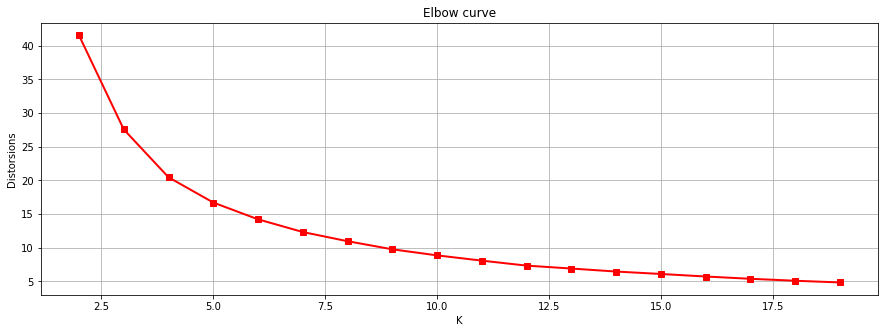

In [23]:
distorsions = []  
for k in range(2, 20):
    model_kmeans1 = KMeans(n_clusters=k)
    model_kmeans1.fit(df_r)
    distorsions.append(model_kmeans1.inertia_) 

fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 20), distorsions, marker='s', c='r', linewidth = 2)
plt.grid(True)
plt.xlabel('K')
plt.ylabel('Distorsions')
plt.title('Elbow curve');

In [24]:
# Calculating silhouette scores 

range_n_clusters = np.arange(2,6)

for n_clusters in range_n_clusters:
    
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(df_r)

    silhouette_avg = silhouette_score(df_r, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

KeyboardInterrupt: 

In [25]:
kmean = KMeans(n_clusters = 3)
kmean.fit(df_r)

KMeans(n_clusters=3)

In [26]:
labels = kmean.fit_predict(df_r)
labels

array([0, 1, 0, ..., 0, 0, 0])

In [27]:
kmean_df = df_r.copy()
kmean_df['label-Kmean'] = pd.DataFrame(labels)
kmean_count = pd.DataFrame(kmean_df['label-Kmean'].value_counts())
kmean_count

,label-Kmean
0,60465
1,4772
2,508


In [28]:
silhouette_kmean = silhouette_score(df_r, labels)
print("Silhouette Score = {} ".format(silhouette_kmean))

KeyboardInterrupt: 

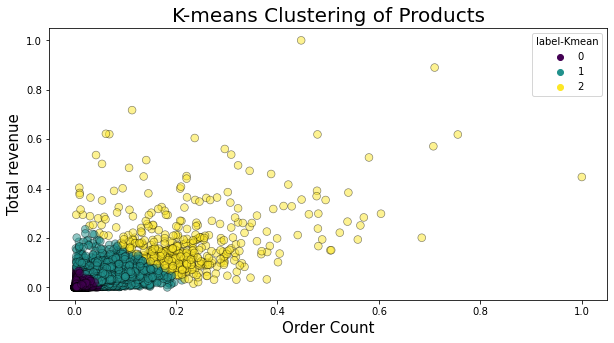

In [29]:
plt.figure(figsize = (10,5))

sb.scatterplot(x = kmean_df['order_count'] , y = kmean_df["total_sales"], hue = kmean_df['label-Kmean'], data=kmean_df, palette = 'viridis', s = 60, ec = 'black', alpha = 0.5)
plt.title('K-means Clustering of Products', size= 20)
plt.xlabel("Order Count",size = 15)
plt.ylabel("Total revenue",size = 15)

plt.show()

In [30]:
df4 = df3.copy()
df4["ProductID"] = merge['ProductID']
df4['label'] = labels
df4['class'] = df1.demand
df4

,order_count,total_sales,ProductID,label,class
0,13,212.192322,0001393774,0,Low
1,140,837.200000,0005164885,1,High
2,7,112.162395,0005465079,0,Low
3,35,384.650000,1450734618,0,Average
4,6,83.820000,1567694373,0,Low
...,...,...,...,...,...
65740,7,81.060000,B01HIDSULW,0,Low
65741,5,69.900000,B01HIE1OYQ,0,Low
65742,6,59.880000,B01HINXMPG,0,Low
65743,6,48.000000,B01HJDG28E,0,Low


In [31]:
df4[df4.label == 1].describe()

,order_count,total_sales,label
count,4772.000000,4772.000000,4772.0
mean,80.030595,1055.420542,1.0
std,36.760834,641.638241,0.0
min,4.000000,2.170000,1.0
25%,55.000000,643.080000,1.0
50%,70.000000,899.050000,1.0
75%,98.000000,1323.647500,1.0
max,251.000000,5606.640000,1.0


In [32]:
df4[df4.label == 1]

,order_count,total_sales,ProductID,label,class
1,140,837.200000,0005164885,1,High
8,115,1601.273809,1858704553,1,High
9,112,640.640000,1858705223,1,High
10,59,1415.410000,1858705770,1,Average
21,117,1744.605976,5558160063,1,High
...,...,...,...,...,...
65642,183,1002.840000,B01GKJQN8C,1,High
65650,84,763.560000,B01GQWUDIY,1,Average
65667,65,628.550000,B01GVQWS4C,1,Average
65692,72,1260.000000,B01H4X1XIS,1,Average


In [33]:
df4['class'][df4.label == 1].value_counts()

Average     3563
High        1144
Low           64
Very Low       1
Name: class, dtype: int64

In [34]:
x = data[['asin','title','main_cat','primary_category',"sub_cat"]]

In [35]:
y = df4.merge(x,how = 'left', left_on = "ProductID", right_on='asin' )
y = y.drop_duplicates(keep = 'first', ignore_index = True)
y.drop('asin', axis = 1, inplace = True)
y

,order_count,total_sales,ProductID,label,class,title,main_cat,primary_category,sub_cat
0,13,212.192322,0001393774,0,Low,Songs for the Shepherd,Digital Music,['Christian'],['Christian']
1,140,837.200000,0005164885,1,High,Christmas Eve and Other Stories,Digital Music,['Holiday & Wedding'],['Holiday & Wedding']
2,7,112.162395,0005465079,0,Low,Forgiven,Digital Music,['Christian'],['Pop & Contemporary']
3,35,384.650000,1450734618,0,Average,Goodbye Worries,Digital Music,['Comedy & Spoken Word'],['Spoken Word']
4,6,83.820000,1567694373,0,Low,Glory to the Holy One: Sacred Music for the Pe...,Digital Music,['Opera & Classical Vocal'],['Opera & Classical Vocal']
...,...,...,...,...,...,...,...,...,...
65740,7,81.060000,B01HIDSULW,0,Low,Porcupine Meat,Digital Music,['Blues'],['Blues']
65741,5,69.900000,B01HIE1OYQ,0,Low,Yellowcard,Digital Music,['Pop'],['Pop']
65742,6,59.880000,B01HINXMPG,0,Low,Crossroads,Digital Music,['Classical'],['Classical']
65743,6,48.000000,B01HJDG28E,0,Low,Night Hawk,Digital Music,['Country'],['Country']


In [36]:
y[y.label == 1]

,order_count,total_sales,ProductID,label,class,title,main_cat,primary_category,sub_cat
1,140,837.200000,0005164885,1,High,Christmas Eve and Other Stories,Digital Music,['Holiday & Wedding'],['Holiday & Wedding']
8,115,1601.273809,1858704553,1,High,Chickenfoot III: Classic Rock,Digital Music,['Rock'],['Hard Rock']
9,112,640.640000,1858705223,1,High,Apocalyptic Love: UK Fan Pack Edition,Digital Music,['Rock'],['Rock']
10,59,1415.410000,1858705770,1,Average,Last of a Dyin' Breed: Fanpack,Digital Music,['Classic Rock'],['Southern Rock']
21,117,1744.605976,5558160063,1,High,Comatose,Digital Music,['Christian'],['Christian']
...,...,...,...,...,...,...,...,...,...
65642,183,1002.840000,B01GKJQN8C,1,High,Encore: Movie Partners Sing Broadway,Digital Music,['Pop'],['Vocal Pop']
65650,84,763.560000,B01GQWUDIY,1,Average,Moana,Digital Music,"[""Children's Music""]",['Disney']
65667,65,628.550000,B01GVQWS4C,1,Average,"<span id=""parentalAdvisory"" class=""a-size-medi...",Digital Music,['Pop'],['Pop']
65692,72,1260.000000,B01H4X1XIS,1,Average,Life Starts Now,Digital Music,['Pop'],['Pop']


In [37]:
lst=[]
for i in y.sub_cat:
    i = str(i)
    i = i.split('[')[1] 
    i = i.split(']')[0]
    i = i.strip('\"')
    i = i.strip("\'")
   
    #i = i.replace["\'s ",'']
    lst.append(i)
lst

lst1=[]
for i in y.primary_category:
    i = str(i)
    i = i.split('[')[1] 
    i = i.split(']')[0]
    i = i.strip('\"')
    i = i.strip("\'")
   
    #i = i.replace["\'s ",'']
    lst1.append(i)
lst1

y.sub_cat = lst

y.primary_category = lst1
y.head()

,order_count,total_sales,ProductID,label,class,title,main_cat,primary_category,sub_cat
0,13,212.192322,0001393774,0,Low,Songs for the Shepherd,Digital Music,Christian,Christian
1,140,837.200000,0005164885,1,High,Christmas Eve and Other Stories,Digital Music,Holiday & Wedding,Holiday & Wedding
2,7,112.162395,0005465079,0,Low,Forgiven,Digital Music,Christian,Pop & Contemporary
3,35,384.650000,1450734618,0,Average,Goodbye Worries,Digital Music,Comedy & Spoken Word,Spoken Word
4,6,83.820000,1567694373,0,Low,Glory to the Holy One: Sacred Music for the Pe...,Digital Music,Opera & Classical Vocal,Opera & Classical Vocal


In [38]:
high = y[['ProductID','title','main_cat','primary_category','sub_cat']][y.label == 1]
high

,ProductID,title,main_cat,primary_category,sub_cat
1,0005164885,Christmas Eve and Other Stories,Digital Music,Holiday & Wedding,Holiday & Wedding
8,1858704553,Chickenfoot III: Classic Rock,Digital Music,Rock,Hard Rock
9,1858705223,Apocalyptic Love: UK Fan Pack Edition,Digital Music,Rock,Rock
10,1858705770,Last of a Dyin' Breed: Fanpack,Digital Music,Classic Rock,Southern Rock
21,5558160063,Comatose,Digital Music,Christian,Christian
...,...,...,...,...,...
65642,B01GKJQN8C,Encore: Movie Partners Sing Broadway,Digital Music,Pop,Vocal Pop
65650,B01GQWUDIY,Moana,Digital Music,Children's Music,Disney
65667,B01GVQWS4C,"<span id=""parentalAdvisory"" class=""a-size-medi...",Digital Music,Pop,Pop
65692,B01H4X1XIS,Life Starts Now,Digital Music,Pop,Pop


In [39]:
#high.to_csv("High_demanding_products_Digital.csv", index = False)

In [40]:
y.sort_values("total_sales", ascending = False)

,order_count,total_sales,ProductID,label,class,title,main_cat,primary_category,sub_cat
33378,529,23794.42,B000091NKT,2,Very High,Appetite For Destruction - Banned Sleeve,Digital Music,Rock,Hard Rock
45395,840,21176.40,B000VZK7T8,2,Very High,Nevermind,Digital Music,Rock,Hard Rock
52678,135,17074.80,B004RFYEEC,2,High,The Smile Sessions,Digital Music,Pop,Pop
56403,74,14798.52,B009439HP8,2,Average,Apocryphon,Digital Music,Metal,Pop Metal
34494,82,14759.18,B0000DII8S,2,Average,Black Box: The Complete Original Black Sabbath...,Digital Music,Classic Rock,Album-Oriented Rock (AOR)
...,...,...,...,...,...,...,...,...,...
47193,12,0.12,B0018CWWI2,0,Low,Just A Rolling Stone,Digital Music,Pop,Dance Pop
11159,9,0.09,B000002W3I,0,Low,Put Yourself in My Shoes,Digital Music,Country,Today's Country
16882,9,0.09,B000006PYT,0,Low,Emotions,Digital Music,Rock,Progressive
13388,5,0.05,B000003G9Y,0,Low,"Holst: The Planets, Op. 32 / Varese: Arcana",Digital Music,Classical,Classical
